## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = "None"

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp()

W0714 20:59:47.291321  8096 deprecation_wrapper.py:119] From D:\ANACONDA\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0714 20:59:47.314137  8096 deprecation_wrapper.py:119] From D:\ANACONDA\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0714 20:59:47.318106  8096 deprecation_wrapper.py:119] From D:\ANACONDA\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



# SGD

In [7]:
"""
Compile 模型
"""
from keras import optimizers

model = build_mlp()
model.summary()

opt = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer = opt)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_8 (Dense)              (None, 10)                5130      
Total params: 1,578,506
Trainable params: 1,578,506
Non-trainable params: 0
_________________________________________________________________


In [8]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

W0714 21:01:03.020013  8096 deprecation.py:323] From D:\ANACONDA\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0714 21:01:03.111336  8096 deprecation_wrapper.py:119] From D:\ANACONDA\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 11s 216us/step - loss: 1.8401 - acc: 0.3491 - val_loss: 1.7614 - val_acc: 0.3719
Epoch 2/500
50000/50000 [==============================] - 9s 187us/step - loss: 1.6512 - acc: 0.4221 - val_loss: 1.7055 - val_acc: 0.3831
Epoch 3/500
50000/50000 [==============================] - 10s 194us/step - loss: 1.5701 - acc: 0.4514 - val_loss: 1.5730 - val_acc: 0.4374
Epoch 4/500
50000/50000 [==============================] - 10s 190us/step - loss: 1.5168 - acc: 0.4729 - val_loss: 1.5480 - val_acc: 0.4553
Epoch 5/500
50000/50000 [==============================] - 9s 189us/step - loss: 1.4745 - acc: 0.4864 - val_loss: 1.5028 - val_acc: 0.4647
Epoch 6/500
50000/50000 [==============================] - 10s 195us/step - loss: 1.4386 - acc: 0.4986 - val_loss: 1.5380 - val_acc: 0.4487
Epoch 7/500
50000/50000 [==============================] - 9s 187us/step - loss: 1.4030 - acc: 0.5126 - val_loss

Epoch 59/500
50000/50000 [==============================] - 10s 191us/step - loss: 0.6864 - acc: 0.7656 - val_loss: 1.6044 - val_acc: 0.5121
Epoch 60/500
50000/50000 [==============================] - 10s 193us/step - loss: 0.6819 - acc: 0.7675 - val_loss: 1.5780 - val_acc: 0.5165
Epoch 61/500
50000/50000 [==============================] - 10s 192us/step - loss: 0.6605 - acc: 0.7747 - val_loss: 1.7061 - val_acc: 0.4973
Epoch 62/500
50000/50000 [==============================] - 10s 190us/step - loss: 0.6580 - acc: 0.7761 - val_loss: 1.6375 - val_acc: 0.5148
Epoch 63/500
50000/50000 [==============================] - 10s 190us/step - loss: 0.6447 - acc: 0.7822 - val_loss: 1.6821 - val_acc: 0.5011
Epoch 64/500
50000/50000 [==============================] - 10s 193us/step - loss: 0.6374 - acc: 0.7821 - val_loss: 1.6708 - val_acc: 0.5026
Epoch 65/500
50000/50000 [==============================] - 10s 196us/step - loss: 0.6238 - acc: 0.7870 - val_loss: 1.5849 - val_acc: 0.5254
Epoch 66/500


50000/50000 [==============================] - 10s 192us/step - loss: 0.2659 - acc: 0.9180 - val_loss: 1.9868 - val_acc: 0.5279
Epoch 117/500
50000/50000 [==============================] - 10s 191us/step - loss: 0.2561 - acc: 0.9240 - val_loss: 2.0230 - val_acc: 0.5288
Epoch 118/500
50000/50000 [==============================] - 10s 191us/step - loss: 0.2476 - acc: 0.9257 - val_loss: 2.0825 - val_acc: 0.5237
Epoch 119/500
50000/50000 [==============================] - 10s 190us/step - loss: 0.2527 - acc: 0.9235 - val_loss: 2.4848 - val_acc: 0.4830
Epoch 120/500
50000/50000 [==============================] - 10s 192us/step - loss: 0.2544 - acc: 0.9230 - val_loss: 2.3548 - val_acc: 0.4867
Epoch 121/500
50000/50000 [==============================] - 10s 192us/step - loss: 0.2414 - acc: 0.9278 - val_loss: 2.1095 - val_acc: 0.5257ss: 0.2416 - acc: 0
Epoch 122/500
50000/50000 [==============================] - 10s 192us/step - loss: 0.2283 - acc: 0.9339 - val_loss: 2.0262 - val_acc: 0.5299
E

50000/50000 [==============================] - 9s 188us/step - loss: 0.0699 - acc: 0.9895 - val_loss: 2.4213 - val_acc: 0.5341
Epoch 174/500
50000/50000 [==============================] - 9s 188us/step - loss: 0.0674 - acc: 0.9901 - val_loss: 2.4770 - val_acc: 0.5301
Epoch 175/500
50000/50000 [==============================] - 9s 188us/step - loss: 0.0630 - acc: 0.9912 - val_loss: 2.4972 - val_acc: 0.5245
Epoch 176/500
50000/50000 [==============================] - 9s 188us/step - loss: 0.0633 - acc: 0.9911 - val_loss: 2.5242 - val_acc: 0.5229
Epoch 177/500
50000/50000 [==============================] - 9s 187us/step - loss: 0.0648 - acc: 0.9905 - val_loss: 2.4652 - val_acc: 0.5357
Epoch 178/500
50000/50000 [==============================] - 9s 189us/step - loss: 0.0607 - acc: 0.9921 - val_loss: 2.5322 - val_acc: 0.5235
Epoch 179/500
50000/50000 [==============================] - 9s 188us/step - loss: 0.0607 - acc: 0.9917 - val_loss: 2.4993 - val_acc: 0.5267
Epoch 180/500
50000/50000 [

50000/50000 [==============================] - 9s 188us/step - loss: 0.0221 - acc: 0.9990 - val_loss: 2.7014 - val_acc: 0.5353
Epoch 232/500
50000/50000 [==============================] - 10s 192us/step - loss: 0.0224 - acc: 0.9989 - val_loss: 2.6904 - val_acc: 0.5366
Epoch 233/500
50000/50000 [==============================] - 10s 190us/step - loss: 0.0219 - acc: 0.9990 - val_loss: 2.7027 - val_acc: 0.5371
Epoch 234/500
50000/50000 [==============================] - 10s 191us/step - loss: 0.0212 - acc: 0.9990 - val_loss: 2.6934 - val_acc: 0.5380
Epoch 235/500
50000/50000 [==============================] - 9s 185us/step - loss: 0.0214 - acc: 0.9992 - val_loss: 2.7071 - val_acc: 0.5349
Epoch 236/500
50000/50000 [==============================] - 9s 189us/step - loss: 0.0211 - acc: 0.9991 - val_loss: 2.7367 - val_acc: 0.5327
Epoch 237/500
50000/50000 [==============================] - 9s 188us/step - loss: 0.0204 - acc: 0.9993 - val_loss: 2.7288 - val_acc: 0.5341
Epoch 238/500
50000/5000

50000/50000 [==============================] - 9s 178us/step - loss: 0.0116 - acc: 0.9999 - val_loss: 2.8603 - val_acc: 0.5366
Epoch 289/500
50000/50000 [==============================] - 10s 196us/step - loss: 0.0114 - acc: 0.9998 - val_loss: 2.8582 - val_acc: 0.5369
Epoch 290/500
50000/50000 [==============================] - 9s 184us/step - loss: 0.0115 - acc: 0.9998 - val_loss: 2.8694 - val_acc: 0.5380
Epoch 291/500
50000/50000 [==============================] - 9s 179us/step - loss: 0.0116 - acc: 0.9997 - val_loss: 2.8551 - val_acc: 0.5360
Epoch 292/500
50000/50000 [==============================] - 9s 180us/step - loss: 0.0113 - acc: 0.9998 - val_loss: 2.8684 - val_acc: 0.5360
Epoch 293/500
50000/50000 [==============================] - 9s 188us/step - loss: 0.0113 - acc: 0.9998 - val_loss: 2.8706 - val_acc: 0.5340
Epoch 294/500
50000/50000 [==============================] - 9s 187us/step - loss: 0.0111 - acc: 0.9998 - val_loss: 2.8674 - val_acc: 0.5356
Epoch 295/500
50000/50000 

Epoch 346/500
50000/50000 [==============================] - 9s 189us/step - loss: 0.0076 - acc: 1.0000 - val_loss: 2.9637 - val_acc: 0.5356
Epoch 347/500
50000/50000 [==============================] - 9s 189us/step - loss: 0.0074 - acc: 1.0000 - val_loss: 2.9633 - val_acc: 0.5373
Epoch 348/500
50000/50000 [==============================] - 9s 186us/step - loss: 0.0075 - acc: 1.0000 - val_loss: 2.9669 - val_acc: 0.5351
Epoch 349/500
50000/50000 [==============================] - 9s 184us/step - loss: 0.0074 - acc: 1.0000 - val_loss: 2.9706 - val_acc: 0.5370
Epoch 350/500
50000/50000 [==============================] - 9s 185us/step - loss: 0.0073 - acc: 1.0000 - val_loss: 2.9724 - val_acc: 0.5377
Epoch 351/500
50000/50000 [==============================] - 10s 191us/step - loss: 0.0073 - acc: 1.0000 - val_loss: 2.9719 - val_acc: 0.5368
Epoch 352/500
50000/50000 [==============================] - 9s 187us/step - loss: 0.0073 - acc: 1.0000 - val_loss: 2.9800 - val_acc: 0.5365
Epoch 353/50

50000/50000 [==============================] - 9s 189us/step - loss: 0.0056 - acc: 1.0000 - val_loss: 3.0413 - val_acc: 0.5360
Epoch 404/500
50000/50000 [==============================] - 9s 188us/step - loss: 0.0056 - acc: 1.0000 - val_loss: 3.0410 - val_acc: 0.5341
Epoch 405/500
50000/50000 [==============================] - 9s 189us/step - loss: 0.0055 - acc: 1.0000 - val_loss: 3.0433 - val_acc: 0.5368
Epoch 406/500
50000/50000 [==============================] - 9s 188us/step - loss: 0.0055 - acc: 1.0000 - val_loss: 3.0449 - val_acc: 0.5369
Epoch 407/500
50000/50000 [==============================] - 9s 189us/step - loss: 0.0055 - acc: 1.0000 - val_loss: 3.0559 - val_acc: 0.5385
Epoch 408/500
50000/50000 [==============================] - 9s 189us/step - loss: 0.0055 - acc: 1.0000 - val_loss: 3.0520 - val_acc: 0.5365
Epoch 409/500
50000/50000 [==============================] - 9s 189us/step - loss: 0.0054 - acc: 1.0000 - val_loss: 3.0478 - val_acc: 0.5380
Epoch 410/500
50000/50000 [

50000/50000 [==============================] - 9s 188us/step - loss: 0.0044 - acc: 1.0000 - val_loss: 3.1031 - val_acc: 0.5390
Epoch 462/500
50000/50000 [==============================] - 10s 190us/step - loss: 0.0044 - acc: 1.0000 - val_loss: 3.1029 - val_acc: 0.5360
Epoch 463/500
50000/50000 [==============================] - 9s 190us/step - loss: 0.0044 - acc: 1.0000 - val_loss: 3.1074 - val_acc: 0.5374
Epoch 464/500
50000/50000 [==============================] - 10s 190us/step - loss: 0.0044 - acc: 1.0000 - val_loss: 3.1075 - val_acc: 0.5374
Epoch 465/500
50000/50000 [==============================] - 9s 189us/step - loss: 0.0043 - acc: 1.0000 - val_loss: 3.1086 - val_acc: 0.5368
Epoch 466/500
50000/50000 [==============================] - 9s 190us/step - loss: 0.0043 - acc: 1.0000 - val_loss: 3.1076 - val_acc: 0.5374
Epoch 467/500
50000/50000 [==============================] - 10s 190us/step - loss: 0.0043 - acc: 1.0000 - val_loss: 3.1132 - val_acc: 0.537643 - acc: 1.000
Epoch 468

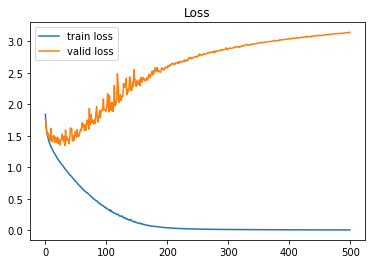

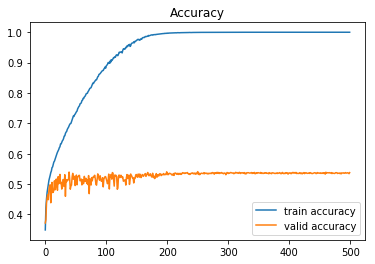

In [10]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()